In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

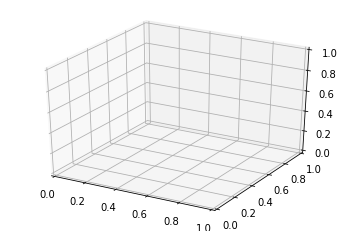

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

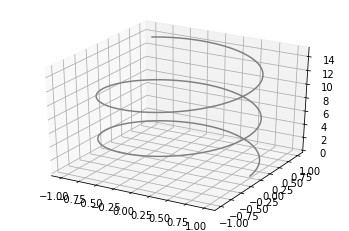

In [3]:
ax = plt.axes(projection='3d')
z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)

ax.plot3D(x_line, y_line, z_line, 'gray')